<a href="https://colab.research.google.com/github/cbrink585/dsc650/blob/master/Copy_of_Test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

In [ ]:
import keras
keras.__version__

'2.12.0'

In [ ]:
# Load the dataset
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_labels[0]

1

In [ ]:
#Since we restricted ourselves to the top 10,000 most frequent words, no word index will exceed 10,000:
max([max(sequence) for sequence in train_data])

9999

In [ ]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

1641221/1641221 [==============================] - 0s 0us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
# Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # set specific indices of results[i] to 1s
    return results
# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [ ]:
# Print sample
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
#The Keras implementation
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) 

In [ ]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [ ]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 6s 153ms/step - loss: 0.5215 - binary_accuracy: 0.7855 - val_loss: 0.4253 - val_binary_accuracy: 0.8426
Epoch 2/20
30/30 [==============================] - 3s 92ms/step - loss: 0.3204 - binary_accuracy: 0.9001 - val_loss: 0.3135 - val_binary_accuracy: 0.8861
Epoch 3/20
30/30 [==============================] - 2s 67ms/step - loss: 0.2333 - binary_accuracy: 0.9231 - val_loss: 0.3203 - val_binary_accuracy: 0.8683
Epoch 4/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1819 - binary_accuracy: 0.9397 - val_loss: 0.2882 - val_binary_accuracy: 0.8828
Epoch 5/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1482 - binary_accuracy: 0.9526 - val_loss: 0.2891 - val_binary_accuracy: 0.8836
Epoch 6/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1215 - binary_accuracy: 0.9624 - val_loss: 0.3304 - val_binary_accuracy: 0.8751
Epoch 7/20
30/30 [==============================] - 1s 39ms/step - lo

In [ ]:
history_dict = history.history
history_dict.keys()
#dict_keys(['loss', 'val_loss', 'binary_accuracy', 'val_binary_accuracy'])
#history_dict = history.history
print(history_dict)

{'loss': [0.52152019739151, 0.320352703332901, 0.23325751721858978, 0.1818932741880417, 0.148198202252388, 0.12151970714330673, 0.10054364055395126, 0.08170312643051147, 0.06852997094392776, 0.05518193542957306, 0.04577992483973503, 0.03693719208240509, 0.028863925486803055, 0.02192872390151024, 0.017613712698221207, 0.014983514323830605, 0.009248950518667698, 0.009952192194759846, 0.004558905493468046, 0.006956120487302542], 'binary_accuracy': [0.7854666709899902, 0.9001333117485046, 0.9230666756629944, 0.9397333264350891, 0.9526000022888184, 0.9624000191688538, 0.9697333574295044, 0.977733314037323, 0.9812666773796082, 0.9862666726112366, 0.9896666407585144, 0.9918666481971741, 0.9943333268165588, 0.9964666962623596, 0.9975333213806152, 0.9976000189781189, 0.9994666576385498, 0.9983999729156494, 0.9998666644096375, 0.9988666772842407], 'val_loss': [0.42534804344177246, 0.3134823441505432, 0.3203340768814087, 0.2882138788700104, 0.28912320733070374, 0.33044877648353577, 0.321344703435

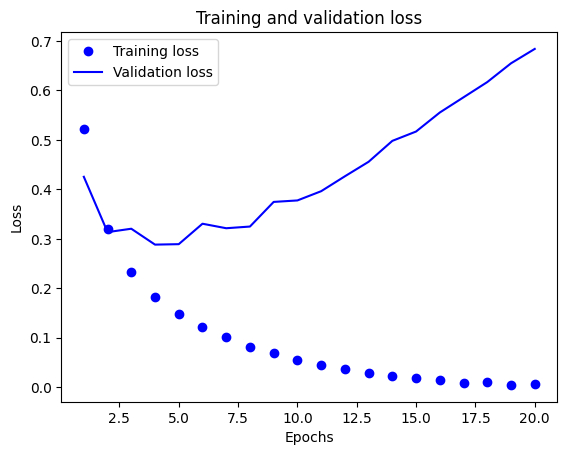

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
#acc = history.history['acc']
#val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

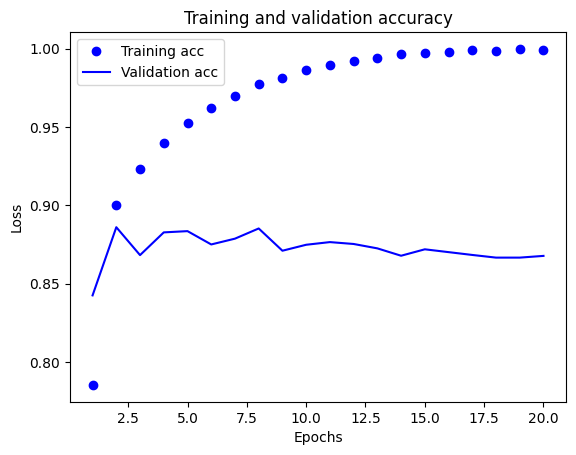

In [ ]:
plt.clf() # clear figure
#acc_values = history_dict['acc']
#val_acc_values = history_dict['val_acc']
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 4s 64ms/step - loss: 0.4651 - accuracy: 0.8038
Epoch 2/4
49/49 [==============================] - 2s 30ms/step - loss: 0.2711 - accuracy: 0.9048
Epoch 3/4
49/49 [==============================] - 1s 29ms/step - loss: 0.2094 - accuracy: 0.9256
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.3014 - accuracy: 0.8790


In [ ]:
results

[0.3014098107814789, 0.8789600133895874]

In [ ]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.15612327],
       [0.99980277],
       [0.7193971 ],
       ...,
       [0.08875883],
       [0.04912009],
       [0.5357145 ]], dtype=float32)